# `Project instructions 📁` 

Open and look through the data file. Path to the file: *datasets/users_behavior.csv*
- Split the source data into a training set, a validation set, and a test set.
- Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.
- Check the quality of the model using the test set.
- Additional task: sanity check the model. This data is more complex than what you’re used to working with, so it's not an easy task. We'll take a closer look at it later.

# `Data description 📊`

Every observation in the dataset contains monthly behavior information about one user. The information given is as follows:

> - сalls — number of calls,
> - minutes — total call duration in minutes,
> - messages — number of text messages,
> - mb_used — Internet traffic used in MB,
> - is_ultra — plan for the current month (Ultra - 1, Smart - 0).

# `Tasks 📄` 

- Data Viewing ☑️


- Data Split - training, validation, and test sets ☑️


- Data Set Sizing ☑️
 

- Model Quality ☑️


- Model Types and Hyperparameters ☑️


- Findings ☑️


- Model Testing ☑️


- Model Accuracy ☑️


- Code structure and Neatness 📝



In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sklearn methods and models
from sklearn.model_selection import train_test_split
# Models
    # Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
    # Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
    # Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
# Metrics
    # Accuracy
from sklearn.metrics import accuracy_score
    # MSE
from sklearn.metrics import mean_squared_error 

# Helpful
    # DecisionTreeRegressor(random_state=xxxx, max_depth=xxxx) # model constructor with hyperparameters
    # DecisionTreeClassifier(random_state=xxxx)
    
    # RandomForestClassifier(random_state=xxxx, n_estimators=xxxx)
    # RandomForestRegressor(random_state=xxxx, n_estimators=xxxx, max_depth=xxxx)
    
    # LogisticRegression(random_state=xxxx, solver='liblinear')
    # LinearRegression()
    
    # train_test_split(DataFrame, test_size=xxxx, random_state=xxxx)
    # model.fit(features, target) # training
    # model.predict(features) # predictions
    # accuracy_score(target,predictions)
    # mean_squared_error(answers, predictions) # MSE calculation # **0.5 for RMSE

`Data Viewing 🔍` 

In [2]:
try:
    df = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/Intro to ML/users_behavior.csv')
except:
    print('Double check your file path')

In [3]:
df.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
# Data viewing
print('Data Table:')
display(df)
print('')
print('Data Description:')
df.describe()
#print('')
#print('Data Information:')
#df.info()

Data Table:


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0



Data Description:


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


/var/folders/wc/6x35sr293njgq8g1xgc9fzlm0000gn/T/ipykernel_5048/3488546038.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Smart', 'Ultra'])


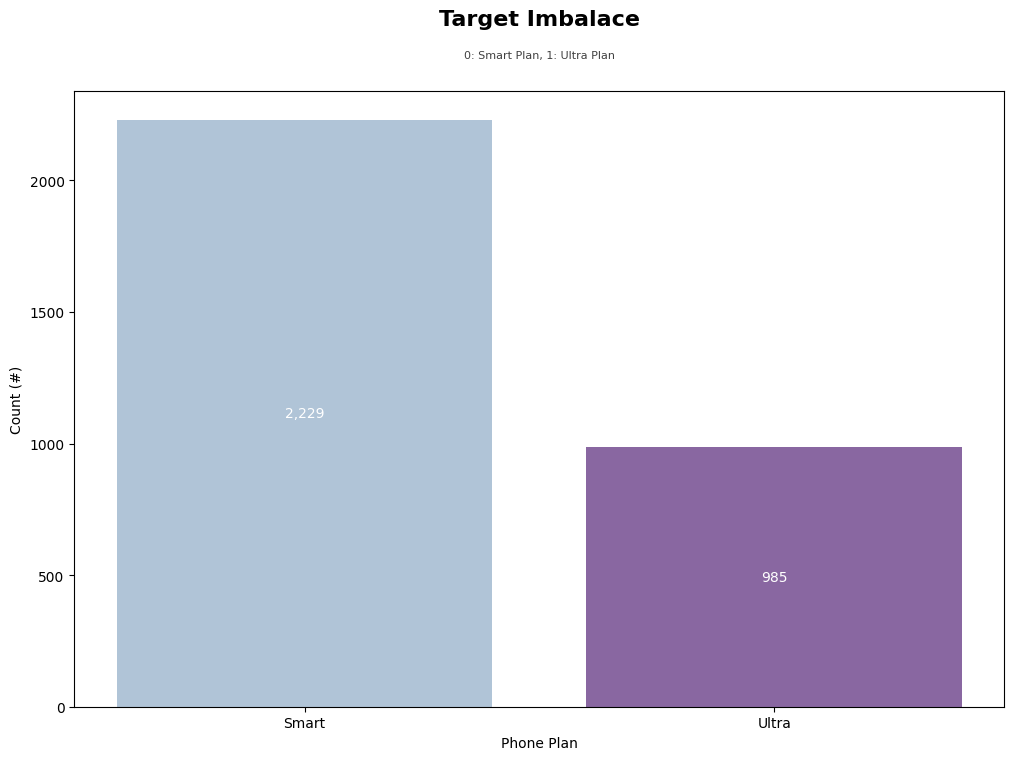

In [5]:
# checking for target imbalance
## amending this at start (balancing), would have yielded better results on the final evaluation
fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(data=df, x='is_ultra', palette="BuPu", ax=ax, hue='is_ultra', legend=None)
ax.set(xlabel="Phone Plan", ylabel='Count (#)')
for c in ax.containers:
    labels = [f'{round((v.get_height())):,}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white')

ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
ax.set_xticklabels(['Smart', 'Ultra'])
ax.text(x=0.5, y=1.1, s='Target Imbalace', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='0: Smart Plan, 1: Ultra Plan', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

# sns.despine(offset=10,
#             trim=True
#             )
plt.show()

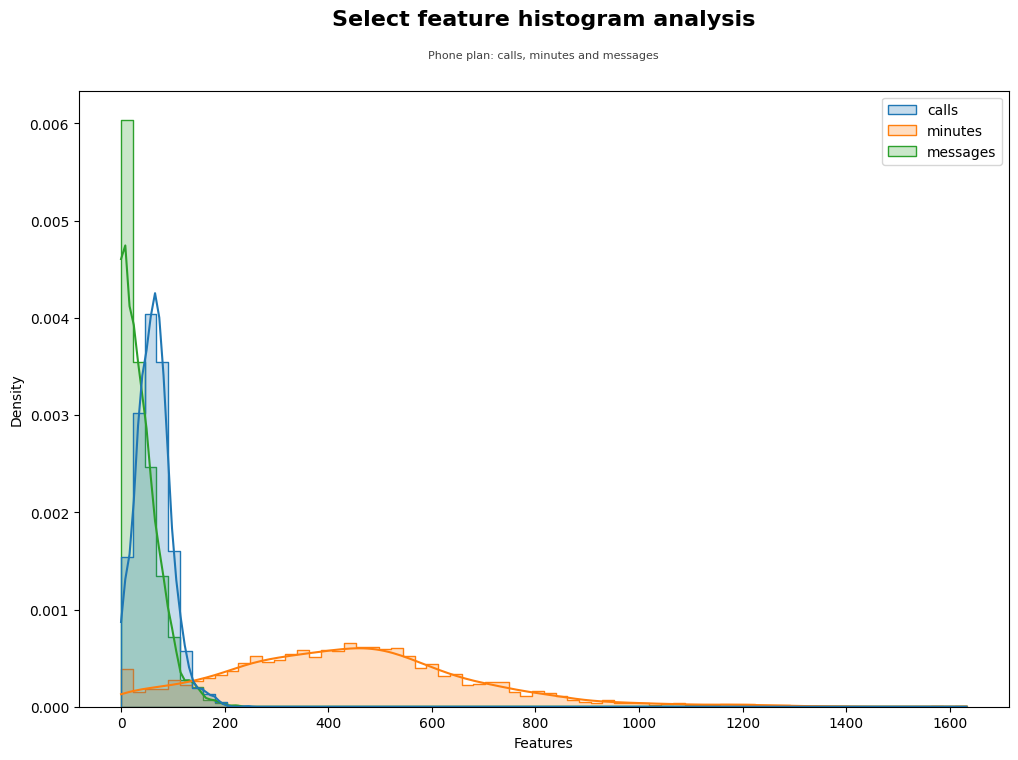

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data=df[['calls','minutes', 'messages']], kde=True, element="step", stat="density", bins='auto', ax=ax
             #hue='calls', palette="BuPu", ax=ax, legend=None
             )
ax.set(xlabel="Features")
ax.text(x=0.5, y=1.1, s='Select feature histogram analysis', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Phone plan: calls, minutes and messages', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.show()


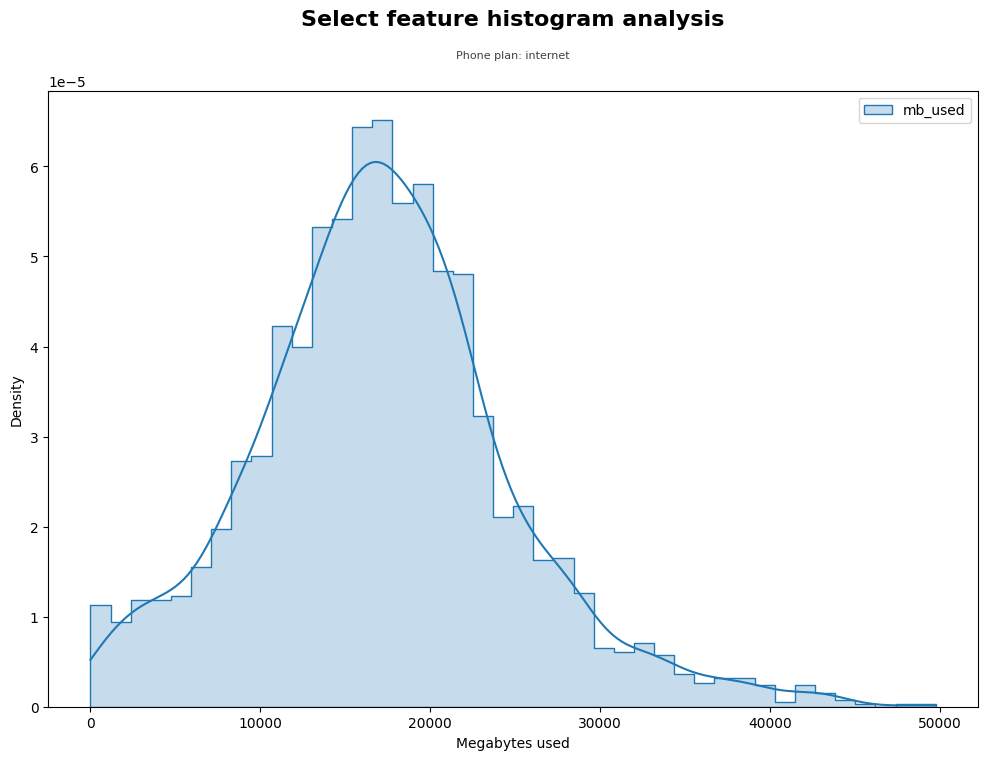

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data=df[['mb_used']], kde=True, element="step", stat="density", bins='auto', ax=ax
             #hue='calls', palette="BuPu", ax=ax, legend=None
             )
ax.set(xlabel="Megabytes used")
ax.text(x=0.5, y=1.1, s='Select feature histogram analysis', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Phone plan: internet', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.show()

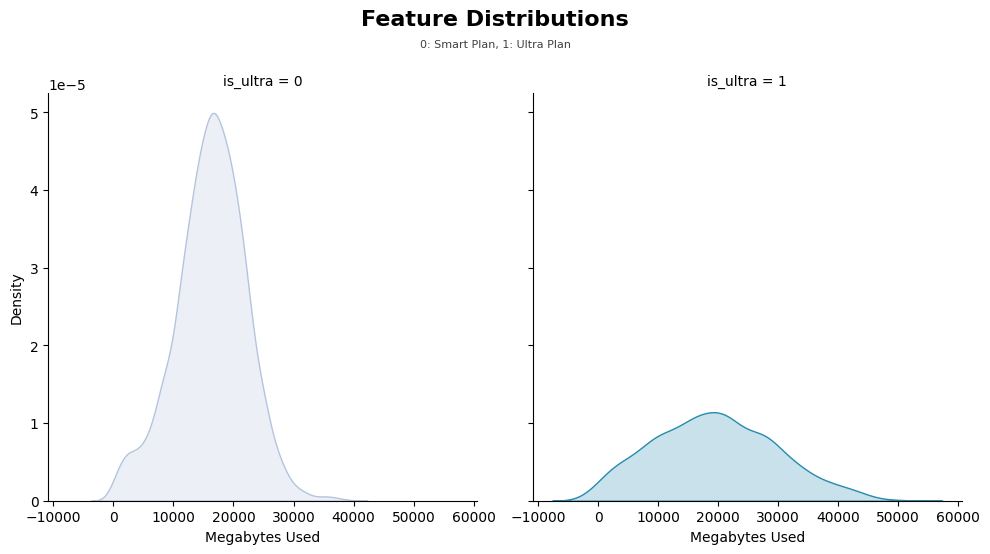

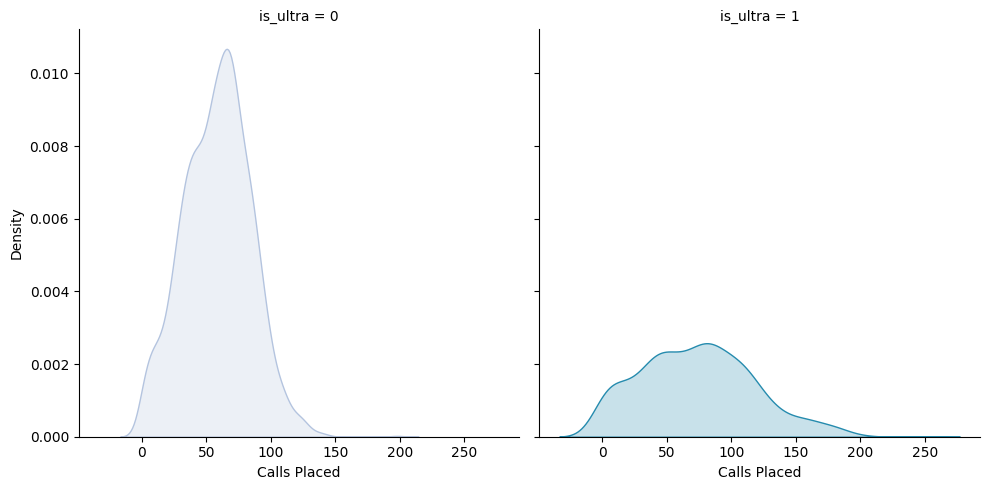

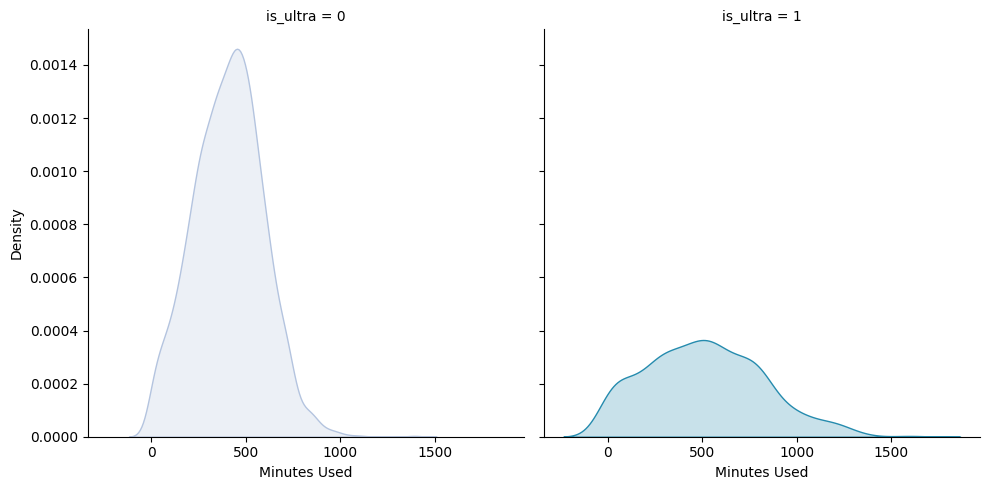

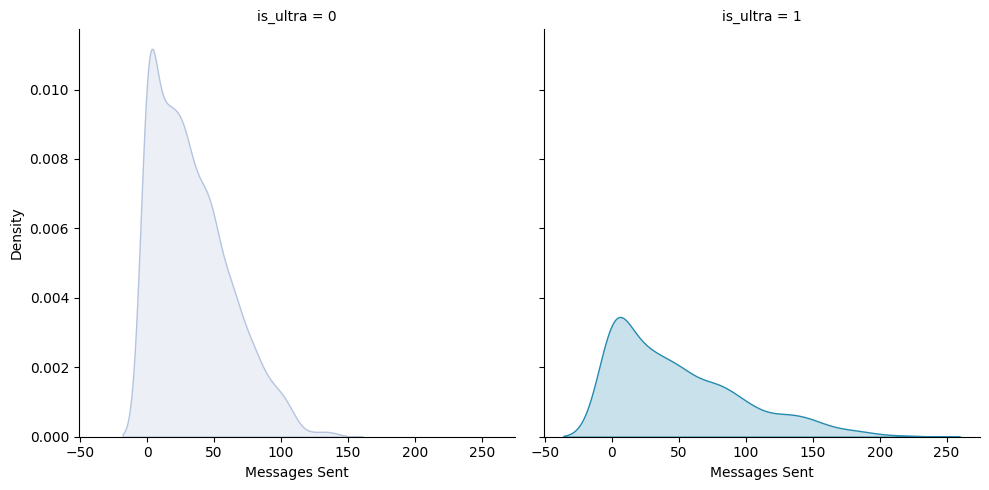

In [8]:
fig, ax = plt.subplots(figsize=(12, 10), sharex=False, sharey=False)
plt.close()
g = sns.displot(data=df, x="mb_used", col="is_ultra", hue='is_ultra', kind="kde", legend=None, fill=True, palette='PuBuGn').set(xlabel='Megabytes Used')
g.fig.suptitle('Feature Distributions', x=0.5, y=1.1, ha='center', va='top', fontsize=16, weight='bold')
g.fig.text(x=0.5, y=1.02, s='0: Smart Plan, 1: Ultra Plan', fontsize=8, alpha=0.75, ha='center', va='bottom')

sns.displot(data=df, x="calls", col="is_ultra", hue='is_ultra', kind="kde", legend=None, fill=True, palette='PuBuGn').set(xlabel='Calls Placed')
sns.displot(data=df, x="minutes", col="is_ultra", hue='is_ultra', kind="kde", legend=None, fill=True, palette='PuBuGn').set(xlabel='Minutes Used')
sns.displot(data=df, x="messages", col="is_ultra", hue='is_ultra', kind="kde", legend=None, fill=True, palette='PuBuGn').set(xlabel='Messages Sent')

plt.tight_layout()
plt.show()

`Data Splitting ✂` 

In [9]:
# Data splitting/sizing
# Splitting the df twice in order to get a test dataset (since it's not readily available)

features = df.drop(['is_ultra'], axis=1) # extracting features
target = df.is_ultra # extracting target

#features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
#                                                                              test_size=0.25, random_state=12345) # data split, 25% for validation set

# x features
# y target

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.2, random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, 
                                                                          test_size=0.25, random_state=12345)

print(features_train.shape)
print(target_train.shape)
print(features_valid.shape) # 20%
print(target_valid.shape) # 20%
print(features_test.shape) # 20%
print(target_test.shape) # 20%

(1928, 4)
(1928,)
(643, 4)
(643,)
(643, 4)
(643,)


`Model Quality 🎯` 

In [10]:
# Model #1 - Decision Trees
# prediction between Smart and Ultra plans

best_val_model = None
best_val_result = 0
for val_depth in range(1, 6):
    model_val = DecisionTreeClassifier(random_state=12345, max_depth=val_depth) # model intitialization
    model_val.fit(features_train, target_train) # model training
    predictions_val = model_val.predict(features_valid) # model predictions
    result_val = accuracy_score(target_valid, predictions_val) # accuracy calculation
    if result_val > best_val_result:
        best_val_model = model_val
        best_val_result = result_val

print("Accuracy of the best initial model on the validation set:", best_val_result)


Accuracy of the best initial model on the validation set: 0.7651632970451011


In [11]:
# Model #1 - Decision Trees (continued - by max_depth)
# tuning max_depth on validation set

for tree_depth in range(1,25):
    #creating the model
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=tree_depth)
    #training the model
    tree_model.fit(features_train,target_train)
    #predictions using validation set
    predictions_valid = tree_model.predict(features_valid)
    #result
    print('max_depth =', tree_depth, ": ", end='')
    print(accuracy_score(target_valid,predictions_valid)) # best depth = 7 / 0.7744945567651633
    

max_depth = 1 : 0.7387247278382582
max_depth = 2 : 0.7573872472783826
max_depth = 3 : 0.7651632970451011
max_depth = 4 : 0.7636080870917574
max_depth = 5 : 0.7589424572317263
max_depth = 6 : 0.7573872472783826
max_depth = 7 : 0.7744945567651633
max_depth = 8 : 0.7667185069984448
max_depth = 9 : 0.7620528771384136
max_depth = 10 : 0.7713841368584758
max_depth = 11 : 0.7589424572317263
max_depth = 12 : 0.7558320373250389
max_depth = 13 : 0.749611197511664
max_depth = 14 : 0.7573872472783826
max_depth = 15 : 0.7527216174183515
max_depth = 16 : 0.749611197511664
max_depth = 17 : 0.7387247278382582
max_depth = 18 : 0.7418351477449455
max_depth = 19 : 0.7356143079315708
max_depth = 20 : 0.7293934681181959
max_depth = 21 : 0.7325038880248833
max_depth = 22 : 0.71850699844479
max_depth = 23 : 0.7293934681181959
max_depth = 24 : 0.7262830482115086


In [12]:
feature_importances = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance')


Top 10 Features:
    Feature  Importance
0     calls    0.150094
2  messages    0.206104
1   minutes    0.280047
3   mb_used    0.363755


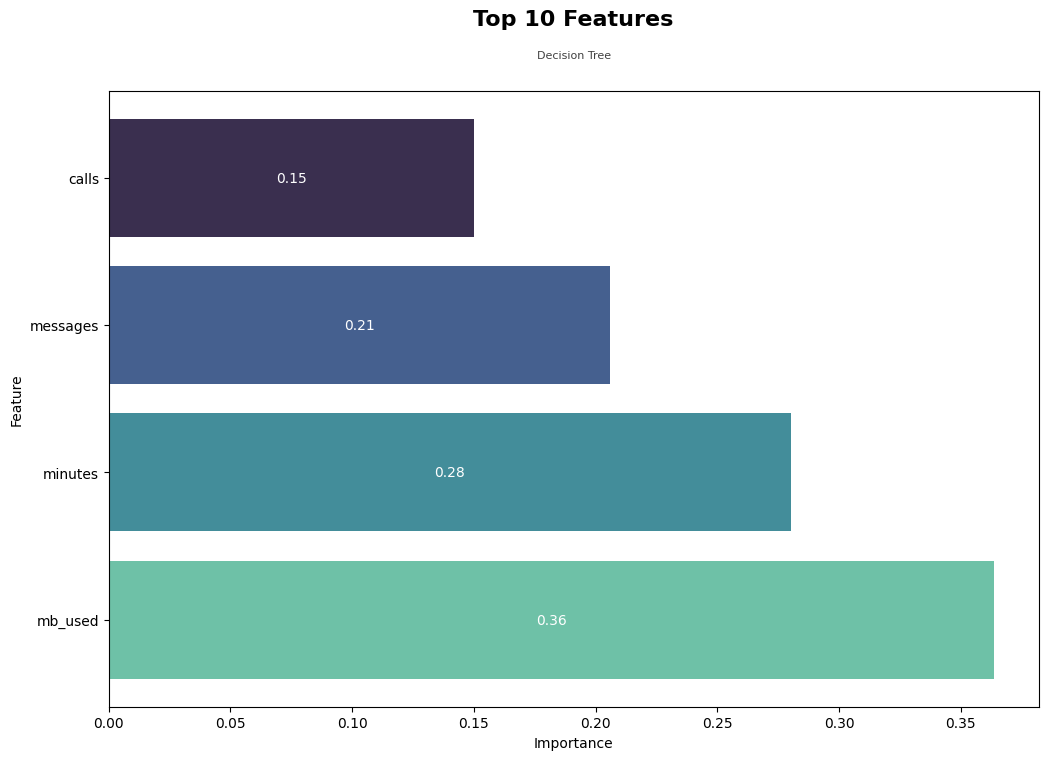

In [13]:
top_10_features = feature_importance_df.head(10)
print("Top 10 Features:")
print(top_10_features)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data = top_10_features,
            y = 'Feature', x = 'Importance',
              palette="mako", hue='Feature',
              ax=ax)


for c in ax.containers:
    labels = [f'{( round(v.get_width(),2) )}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white')

ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
ax.text(x=0.5, y=1.1, s='Top 10 Features', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Decision Tree', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

plt.xlabel('Importance')
plt.show()

In [14]:
# Model #2 - Forest Classifier
# prediction between Smart and Ultra plans


best_score_for = 0
best_est_for = 0
for val_est_for in range(1, 6): #base range
    model_val_for = RandomForestClassifier(random_state=12345, n_estimators=val_est_for) # model intitialization
    model_val_for.fit(features_train, target_train) # model training
    score_val_for = model_val_for.score(features_valid, target_valid) # accuracy calculation
    if score_val_for > best_score_for:
        best_score_for = score_val_for
        best_est_for = model_val_for

print("Classifier Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est_for, best_score_for))


Classifier Accuracy of the best model on the validation set (n_estimators = RandomForestClassifier(n_estimators=4, random_state=12345)): 0.7651632970451011


`Forest Model Tuning 🎯` 

In [15]:
# Model #2 - Forest Classifier
# tuning n_estimators on validation set

print('n_estimator tuning only:')
best_score_for = 0
best_est_for = 0
for val_est_for in range(1, 25): # tuning n_estimators / # best n_estimator: 22 / 0.7931570762052877
    model_val_for = RandomForestClassifier(random_state=12345, n_estimators=val_est_for) # model intitialization
    model_val_for.fit(features_train, target_train) # model training
    score_val_for = model_val_for.score(features_valid, target_valid) # accuracy calculation
    if score_val_for > best_score_for:
        best_score_for = score_val_for
        best_est_for = model_val_for

print("Classifier Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est_for, best_score_for))
print('')

print('further hyperparameter tuning:')
for forest_depth in range(1,30): # further tuning n_estimators and checking for the best n
    #creating the model
    forest_model = RandomForestClassifier(random_state=12345, n_estimators=forest_depth, min_samples_split= 4,
                                         max_samples=200)
    #training the model
    forest_model.fit(features_train,target_train)
    #predictions using validation set
    predictions_valid = forest_model.predict(features_valid)
    #result
    print('n_estimators =', forest_depth, ": ", end='')
    print(accuracy_score(target_valid,predictions_valid)) 
    
# n_estimators tuning: diminishing accuracy after the 23rd n (range of 0,25)
# min_samples_split tuning: 79.78% accuracy with a min_samples_split of 4 (instead of 2)
# max_samples tuning: 80.09% accuracy with a max_samples of 200 where n_estimators = 24 (range of 0,25)
# max_leaf_nodes tuning: tuning this hyperparameter yielded no incrementally positive results
# class_weight tuning: tuning this hyperparameter yielded no incrementally positive results

n_estimator tuning only:


Classifier Accuracy of the best model on the validation set (n_estimators = RandomForestClassifier(n_estimators=22, random_state=12345)): 0.7931570762052877

further hyperparameter tuning:
n_estimators = 1 : 0.7247278382581649
n_estimators = 2 : 0.7542768273716952
n_estimators = 3 : 0.7651632970451011
n_estimators = 4 : 0.7682737169517885
n_estimators = 5 : 0.7744945567651633
n_estimators = 6 : 0.7822706065318819
n_estimators = 7 : 0.7776049766718507
n_estimators = 8 : 0.7776049766718507
n_estimators = 9 : 0.7884914463452566
n_estimators = 10 : 0.7853810264385692
n_estimators = 11 : 0.7931570762052877
n_estimators = 12 : 0.7869362363919129
n_estimators = 13 : 0.7947122861586314
n_estimators = 14 : 0.7900466562986003
n_estimators = 15 : 0.7947122861586314
n_estimators = 16 : 0.7853810264385692
n_estimators = 17 : 0.7931570762052877
n_estimators = 18 : 0.7931570762052877
n_estimators = 19 : 0.7916018662519441
n_estimators = 20 : 0.7916018662519441
n_estimators = 21 : 0.7931570762052877
n

In [16]:
feature_importances = forest_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance')

Top 10 Features:
    Feature  Importance
0     calls    0.187069
2  messages    0.217152
1   minutes    0.257476
3   mb_used    0.338304


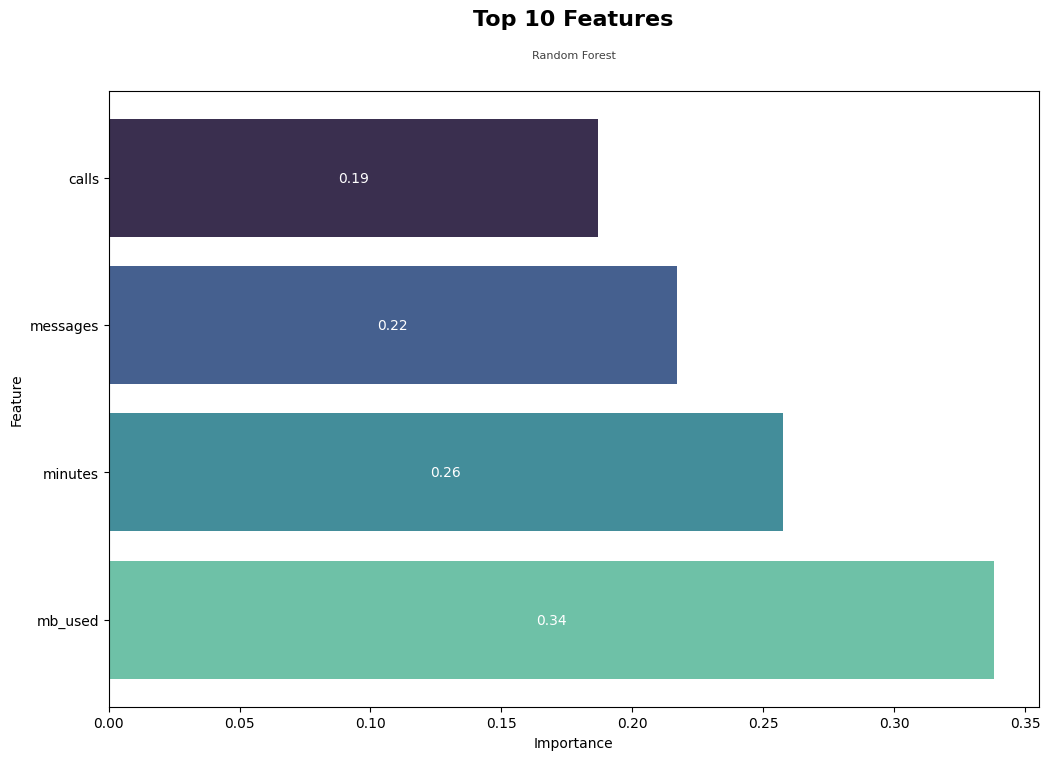

In [17]:
top_10_features = feature_importance_df.head(10)
print("Top 10 Features:")
print(top_10_features)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data = top_10_features,
            y = 'Feature', x = 'Importance',
              palette="mako", hue='Feature',
              ax=ax)


for c in ax.containers:
    labels = [f'{( round(v.get_width(),2) )}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white')

ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
ax.text(x=0.5, y=1.1, s='Top 10 Features', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Random Forest', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

plt.xlabel('Importance')
plt.show()

In [18]:
# Model #3 - Logistic Regression 

log_model =  LogisticRegression(random_state=12345, solver='liblinear') # initializing logistic regression
log_model.fit(features_train, target_train)  # train model on training set
score_valid = log_model.score(features_valid, target_valid)  # validation set accuracy


print("Accuracy of the logistic regression model on the validation set:", score_valid)

Accuracy of the logistic regression model on the validation set: 0.6936236391912908


# `Final Evaluation - Test Set 🕵`

In [19]:
# Selection: Forest Classifier Model

print('Final evalution on test set:')
# model
final_model = RandomForestClassifier(random_state=12345, n_estimators=28)
# train
final_model.fit(features_train, target_train)
# predict
final_predictions_test = final_model.predict(features_test)
# accuracy check
final_model_accuracy = accuracy_score(target_test,final_predictions_test)
#result
print(round((final_model_accuracy * 100), 2),'%') 

Final evalution on test set:


79.16 %


# Conclusions



Decision Tree (Classification):
- Increasing tree depth in our accuracy testing, yields higher accuracy percentages to a certain point. This point is the max depth of 7 where we have an accuracy score of ***77.45% (leveraging the validation set)***, we run the risk of overfitting the model if we continue to increase depth

Random Forest (Classification):
- Overall, the higher the range/n_estimators under the RandomForestClassifier model, the higher the trajectory of our accuracy for the validation set. But, as this increases, the model takes way longer to compute which is always something to take into consideration


- Accuracy for the validation set is above our threshold of 75% at a ***79.32% accuracy score***. If we increase the number of estimators then these percentages increase to a certain point (similar to our Decision Tree) at the expense of slower 'runs' and diminishing returns. This 'inflection' point happens where n = 23.


Logistic (Classification):
- While accuracy is much lower than Decision Tree and Forest models, Logistic Regression is more resistant to overfitting. With that said, the accuracy score is below our 75% threshold -- making it an easy choice not to follow up with this model


Overall:
- Accuracy for the validation set is the highest using the RandomForestClassifer model (79.32%) in comparison with the DecisionTreeClassifier model (77.45%), although not by much so it is worth considering the speed of the results ⬅ ***the ultimate choice might depend on business decisions, are we looking to be as accurate as possible even thought things might be slower or are we comfortable with the slight delta between the two?*** 


- RandomForestClassifer models (using validation set) don't see any accuracy improvements after n_estimators climb above ~23 (diminishing returns)


- Across models, the highest accuracy comes from the 1) RandomForestClassifier, 2) DecisionTreeClassifier and 3) Logistic Regression. While the Random Forest model has the highest percentage of accuracy it also is the slowest and it isn't that far off from our Decision Tree model. Depending on business guidance and/or executive decisions, we can use one or the other (with trade offs)

Final Validation (test set):

- With the chosen model, the Random Forest model, and leveraging the test set for a final evaluation for hyperparameter tuning ***we see an accuracy score @ 79.16% which is higher than our Decision Tree model***
 
    > - ***79.16% accuracy where n_estimators = 28***



**` Given the need for the most accurate model, the recommendation is for Megaline to go with the Random Forest model 📈`**